<a href="https://colab.research.google.com/github/Imokut/my-tensorflow-learning/blob/main/fashion_mnist_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
#set up input and output training data aka example
celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)
l0=tf.keras.layers.Dense(units=4, input_shape=[1])
l1=tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print(model.predict([-40, 0, 25, 100]))
print("the variables of l0 are {}".format(l0.get_weights()))

1/1 [==============================] - 0s 82ms/step
[[-39.965435]
 [ 31.952524]
 [ 76.90126 ]
 [211.74744 ]]
the variables of l0 are [array([[ 0.20891564, -0.1342893 , -0.71709114,  0.03551673]],
      dtype=float32), array([ 3.6608005, -2.4277608, -4.060608 ,  3.3809257], dtype=float32)]


In [4]:
!pip install -U tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 30.6 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.6.0
    Uninstalling tensorflow-datasets-4.6.0:
      Successfully uninstalled tensorflow-datasets-4.6.0


In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import math
import numpy as np
import matplotlib.pyplot as plt
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Load the dataset

In [6]:
#To load the data from tensorflow datasets
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset=dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [7]:
class_names=metadata.features['label'].names
print('Class names: {}'.format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## Explore the data

In [8]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Number of training examples: {}'.format(num_train_examples))
print('Numbers of test examples:    {}'.format(num_test_examples))

Number of training examples: 60000
Numbers of test examples:    10000


## Preprocess the data

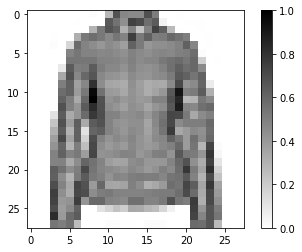

In [9]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /=255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset  = test_dataset.map(normalize)

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

#plot the data
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

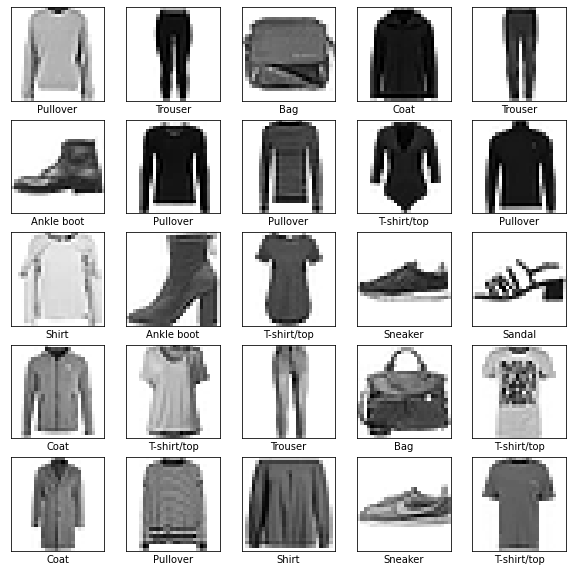

In [11]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_dataset.take(25)):
  image = image.numpy().reshape((28,28))
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
plt.show()

#Build the model

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(
    optimizer='adam', 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics = ['accuracy']
)

#Train the model

In [13]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 11s 2ms/step - loss: 0.4983 - accuracy: 0.8256
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3710 - accuracy: 0.8656
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3336 - accuracy: 0.8785
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3104 - accuracy: 0.8864
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2915 - accuracy: 0.8932


In [14]:
## Evaluate accuracy
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.3582 - accuracy: 0.8746
Accuracy on test dataset: 0.8745999932289124


In [15]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

predictions.shape

1/1 [==============================] - 0s 37ms/step


(32, 10)

In [16]:
predictions[0]

array([6.7002547e-05, 3.2522366e-06, 2.8019996e-02, 5.8727778e-07,
       9.1359985e-01, 3.9660573e-09, 5.8301922e-02, 6.3401562e-10,
       7.4429031e-06, 1.0135489e-08], dtype=float32)

In [17]:
np.argmax([predictions[0]])

4

In [18]:
test_labels[0]

4

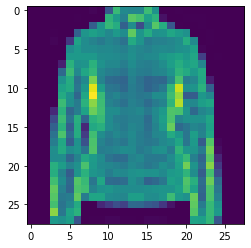

In [21]:
plt.imshow(test_images[0].reshape((28,28)))
plt.show()

In [22]:
class_names[4]

'Coat'